# Koil: A Tool to Design the Winding of Rotating Electric Machinery
creating a symmetrical and balanced winding

<img src="figure/koil_01.jpg" width="300" align="left"/>



In [4]:
from dolomites import koil
import math

In [6]:
import ipywidgets as wg
from IPython.display import Image

def f(x):
      return Image(filename='./figure/koil'+str(x)+'.jpeg')

wg.interact(f, x=wg.IntSlider(min=1,max=14,step=1));

interactive(children=(IntSlider(value=1, description='x', max=14, min=1), Output()), _dom_classes=('widget-int…

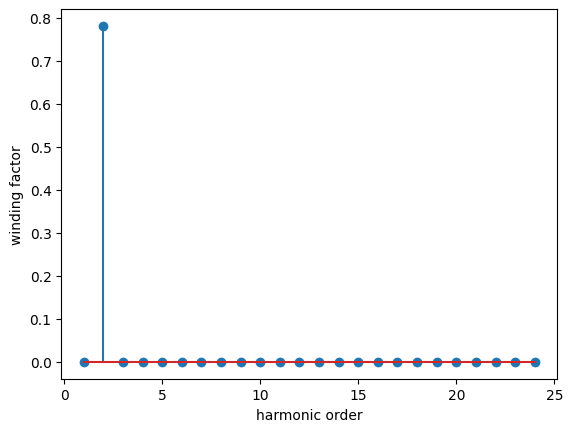

In [10]:
# Example of sinusoidal winding

Q = 36
p = 2
wa = koil.winding(Q,p)
wb = koil.winding(Q,p)
wc = koil.winding(Q,p)
    
for x in range(0, 18):
    angle = math.pi/Q + 2.0*math.pi/Q*x
    na = 1*math.sin(angle*p)
    nb = 1000*math.sin(angle-2./3*math.pi)
    nc = 1000*math.sin(angle-4./3*math.pi)
    wa.add_coil(koil.coil(x+1,Q-x,na))
    wb.add_coil(koil.coil(x+1,Q-x,nb))
    wc.add_coil(koil.coil(x+1,Q-x,nc))
    
nu = []
kw = []
for _nu in range(1,25):
    nu.append(_nu)
    kw.append(wa.get_kw(_nu))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.stem(nu,kw)
plt.xlabel('harmonic order')
plt.ylabel('winding factor');

In [4]:
kw

[0,
 0.7814167995011865,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
sum(abs(wa.get_slot_matrix()))

23.035081932574542

In [11]:
w = koil.m_phase_winding()
m = 3
Q = 12
p = 5

w.compute_winding(m,Q,p,single_layer=False)

 ## Get the winding of each phase

In [12]:
for _w in w.windings:
    print(_w.coils)
#help(koil.Coil)

[coil (4, 5, 1), coil (11, 12, 1), coil (5, 6, -1), coil (10, 11, -1)]
[coil (7, 8, 1), coil (12, 1, 1), coil (1, 2, -1), coil (6, 7, -1)]
[coil (3, 4, 1), coil (8, 9, 1), coil (2, 3, -1), coil (9, 10, -1)]


## Get the winding factors

In [13]:
for _w in w.windings:
    print(_w.get_kw())

0.9330127018922195
0.9330127018922193
0.9330127018922193


In [14]:
for nu in range(1,12):
    print(nu,w.windings[0].get_kw(nu))

1 0.06698729810778069
2 0
3 0.4999999999999999
4 0
5 0.9330127018922195
6 0
7 0.9330127018922194
8 0
9 0.5000000000000007
10 0
11 0.06698729810778102


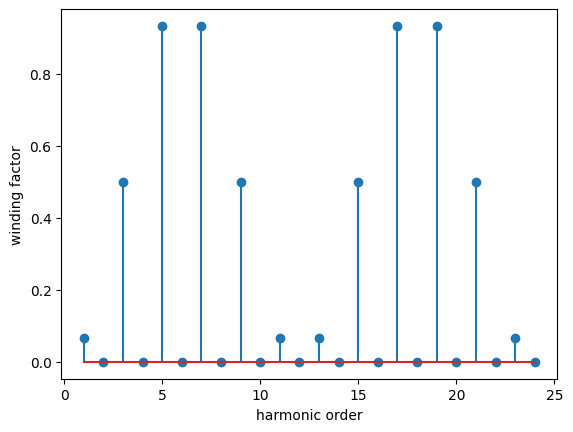

In [15]:
nu = []
kw = []
for _nu in range(1,25):
    nu.append(_nu)
    kw.append(w.windings[0].get_kw(_nu))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.stem(nu,kw)
plt.xlabel('harmonic order')
plt.ylabel('winding factor');

## Get the slot matrix

In [16]:
for _w in w.windings:
    print(_w.get_slot_matrix())


[ 0.   0.   0.   0.5 -1.   0.5  0.   0.   0.  -0.5  1.  -0.5]
[-1.   0.5  0.   0.   0.  -0.5  1.  -0.5  0.   0.   0.   0.5]
[ 0.  -0.5  1.  -0.5  0.   0.   0.   0.5 -1.   0.5  0.   0. ]


In [17]:
for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('lua',name=str(i+1)))

k1 = {0.0,0.0,0.0,0.5,-1.0,0.5,0.0,0.0,0.0,-0.5,1.0,-0.5}
k2 = {-1.0,0.5,0.0,0.0,0.0,-0.5,1.0,-0.5,0.0,0.0,0.0,0.5}
k3 = {0.0,-0.5,1.0,-0.5,0.0,0.0,0.0,0.5,-1.0,0.5,0.0,0.0}


In [18]:
for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('getdp',name=chr(ord('a')+i)))

ka[#1001] = 0.0;
ka[#1002] = 0.0;
ka[#1003] = 0.0;
ka[#1004] = 0.5;
ka[#1005] = -1.0;
ka[#1006] = 0.5;
ka[#1007] = 0.0;
ka[#1008] = 0.0;
ka[#1009] = 0.0;
ka[#1010] = -0.5;
ka[#1011] = 1.0;
ka[#1012] = -0.5;

kb[#1001] = -1.0;
kb[#1002] = 0.5;
kb[#1003] = 0.0;
kb[#1004] = 0.0;
kb[#1005] = 0.0;
kb[#1006] = -0.5;
kb[#1007] = 1.0;
kb[#1008] = -0.5;
kb[#1009] = 0.0;
kb[#1010] = 0.0;
kb[#1011] = 0.0;
kb[#1012] = 0.5;

kc[#1001] = 0.0;
kc[#1002] = -0.5;
kc[#1003] = 1.0;
kc[#1004] = -0.5;
kc[#1005] = 0.0;
kc[#1006] = 0.0;
kc[#1007] = 0.0;
kc[#1008] = 0.5;
kc[#1009] = -1.0;
kc[#1010] = 0.5;
kc[#1011] = 0.0;
kc[#1012] = 0.0;



In [19]:
for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('getdp-2l',name=str(i+1)))

k1[#1001] = 0.0; k1[#2001] = 0.0;
k1[#1002] = 0.0; k1[#2002] = 0.0;
k1[#1003] = 0.0; k1[#2003] = 0.0;
k1[#1004] = 0.5; k1[#2004] = 0.0;
k1[#1005] = -0.5; k1[#2005] = -0.5;
k1[#1006] = 0.0; k1[#2006] = 0.5;
k1[#1007] = 0.0; k1[#2007] = 0.0;
k1[#1008] = 0.0; k1[#2008] = 0.0;
k1[#1009] = 0.0; k1[#2009] = 0.0;
k1[#1010] = -0.5; k1[#2010] = 0.0;
k1[#1011] = 0.5; k1[#2011] = 0.5;
k1[#1012] = 0.0; k1[#2012] = -0.5;

k2[#1001] = -0.5; k2[#2001] = -0.5;
k2[#1002] = 0.0; k2[#2002] = 0.5;
k2[#1003] = 0.0; k2[#2003] = 0.0;
k2[#1004] = 0.0; k2[#2004] = 0.0;
k2[#1005] = 0.0; k2[#2005] = 0.0;
k2[#1006] = -0.5; k2[#2006] = 0.0;
k2[#1007] = 0.5; k2[#2007] = 0.5;
k2[#1008] = 0.0; k2[#2008] = -0.5;
k2[#1009] = 0.0; k2[#2009] = 0.0;
k2[#1010] = 0.0; k2[#2010] = 0.0;
k2[#1011] = 0.0; k2[#2011] = 0.0;
k2[#1012] = 0.5; k2[#2012] = 0.0;

k3[#1001] = 0.0; k3[#2001] = 0.0;
k3[#1002] = -0.5; k3[#2002] = 0.0;
k3[#1003] = 0.5; k3[#2003] = 0.5;
k3[#1004] = 0.0; k3[#2004] = -0.5;
k3[#1005] = 0.0; k3[#2005] = 0.0;
k3

In [20]:
for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('m-file',name=str(i+1)))

k1 = [0.0,0.0,0.0,0.5,-1.0,0.5,0.0,0.0,0.0,-0.5,1.0,-0.5];
k2 = [-1.0,0.5,0.0,0.0,0.0,-0.5,1.0,-0.5,0.0,0.0,0.0,0.5];
k3 = [0.0,-0.5,1.0,-0.5,0.0,0.0,0.0,0.5,-1.0,0.5,0.0,0.0];


## get the GetDP circuits

In [21]:
print(w.windings[0].get_getdp_circuit(id=100,name='a'))
print(w.windings[1].get_getdp_circuit(id=200,name='b'))
print(w.windings[2].get_getdp_circuit(id=300,name='c'))

Case Circuit_a {
    {Region #1004; Branch {100,101};}
    {Region #2005; Branch {102,101};}
    {Region #1011; Branch {102,103};}
    {Region #2012; Branch {104,103};}
    {Region #2006; Branch {104,105};}
    {Region #1005; Branch {106,105};}
    {Region #2011; Branch {106,107};}
    {Region #1010; Branch {108,107};}
    {Region #Ga; Branch {100,108};}
    }

Case Circuit_b {
    {Region #1007; Branch {200,201};}
    {Region #2008; Branch {202,201};}
    {Region #1012; Branch {202,203};}
    {Region #2001; Branch {204,203};}
    {Region #2002; Branch {204,205};}
    {Region #1001; Branch {206,205};}
    {Region #2007; Branch {206,207};}
    {Region #1006; Branch {208,207};}
    {Region #Gb; Branch {200,208};}
    }

Case Circuit_c {
    {Region #1003; Branch {300,301};}
    {Region #2004; Branch {302,301};}
    {Region #1008; Branch {302,303};}
    {Region #2009; Branch {304,303};}
    {Region #2003; Branch {304,305};}
    {Region #1002; Branch {306,305};}
    {Region #2010; Branch {

In [22]:
w

In [25]:
w.calc_mmf()


[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


([0.1303996938995747,
  0.1313996938995747,
  0.3921990816987241,
  0.3931990816987241,
  0.6539984694978735,
  0.6549984694978735,
  0.915797857297023,
  0.916797857297023,
  1.1775972450961723,
  1.1785972450961724,
  1.4393966328953216,
  1.4403966328953217,
  1.7011960206944712,
  1.7021960206944713,
  1.9629954084936205,
  1.9639954084936206,
  2.22479479629277,
  2.22579479629277,
  2.4865941840919197,
  2.4875941840919196,
  2.748393571891069,
  2.7493935718910687,
  3.0101929596902184,
  3.0111929596902183],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

In [18]:
dir(w)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_winding',
 'calc_mmf_harmonics',
 'clear',
 'compute_winding',
 'p',
 'slot_cur_matrix',
 'star',
 'windings']

In [15]:
w.slot_cur_matrix



array([ 2.,  2.,  1.,  1.,  1., -1., -1., -1., -2., -2., -2., -1., -1.,
       -1.,  1.,  1.,  1.,  2.,  2.,  2.,  1.,  1.,  1., -1., -1., -1.,
       -2., -2., -2., -1., -1., -1.,  1.,  1.,  1.,  2.])